In [1]:
# import libraries
import os
import math

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mnso

In [2]:
# read dataset
data_path = Path("data")
data_file = os.path.join(data_path, 'train.csv')

data = pd.read_csv(data_file)
data.head()

/var/folders/5w/bjfc8rgd6b1b9hw70b61ry1c0000gn/T/ipykernel_31103/2185801624.py:5: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_file)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
data.columns.values 

array(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score'],
      dtype=object)

In [6]:
# shape of data
data.shape

(100000, 28)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [8]:
# drop id columns
data.drop(['ID','Customer_ID','Name', 'SSN', 'Type_of_Loan', 'Month'], axis=1, inplace=True)

### Check imbalanced target column

In [9]:
data['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

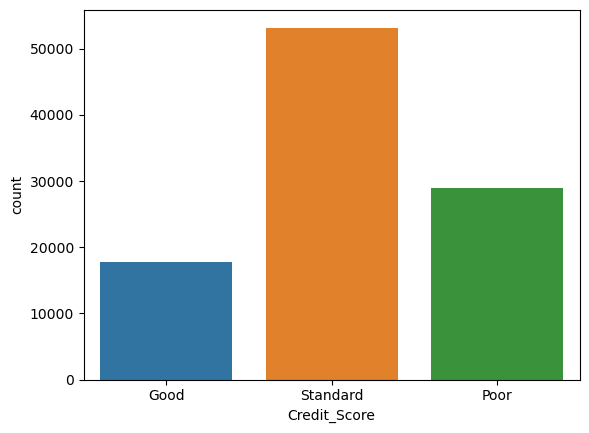

In [10]:
# There's imbalanced data
sns.countplot(x = data["Credit_Score"])

## Data Cleaning

### Check missing values

<AxesSubplot:>

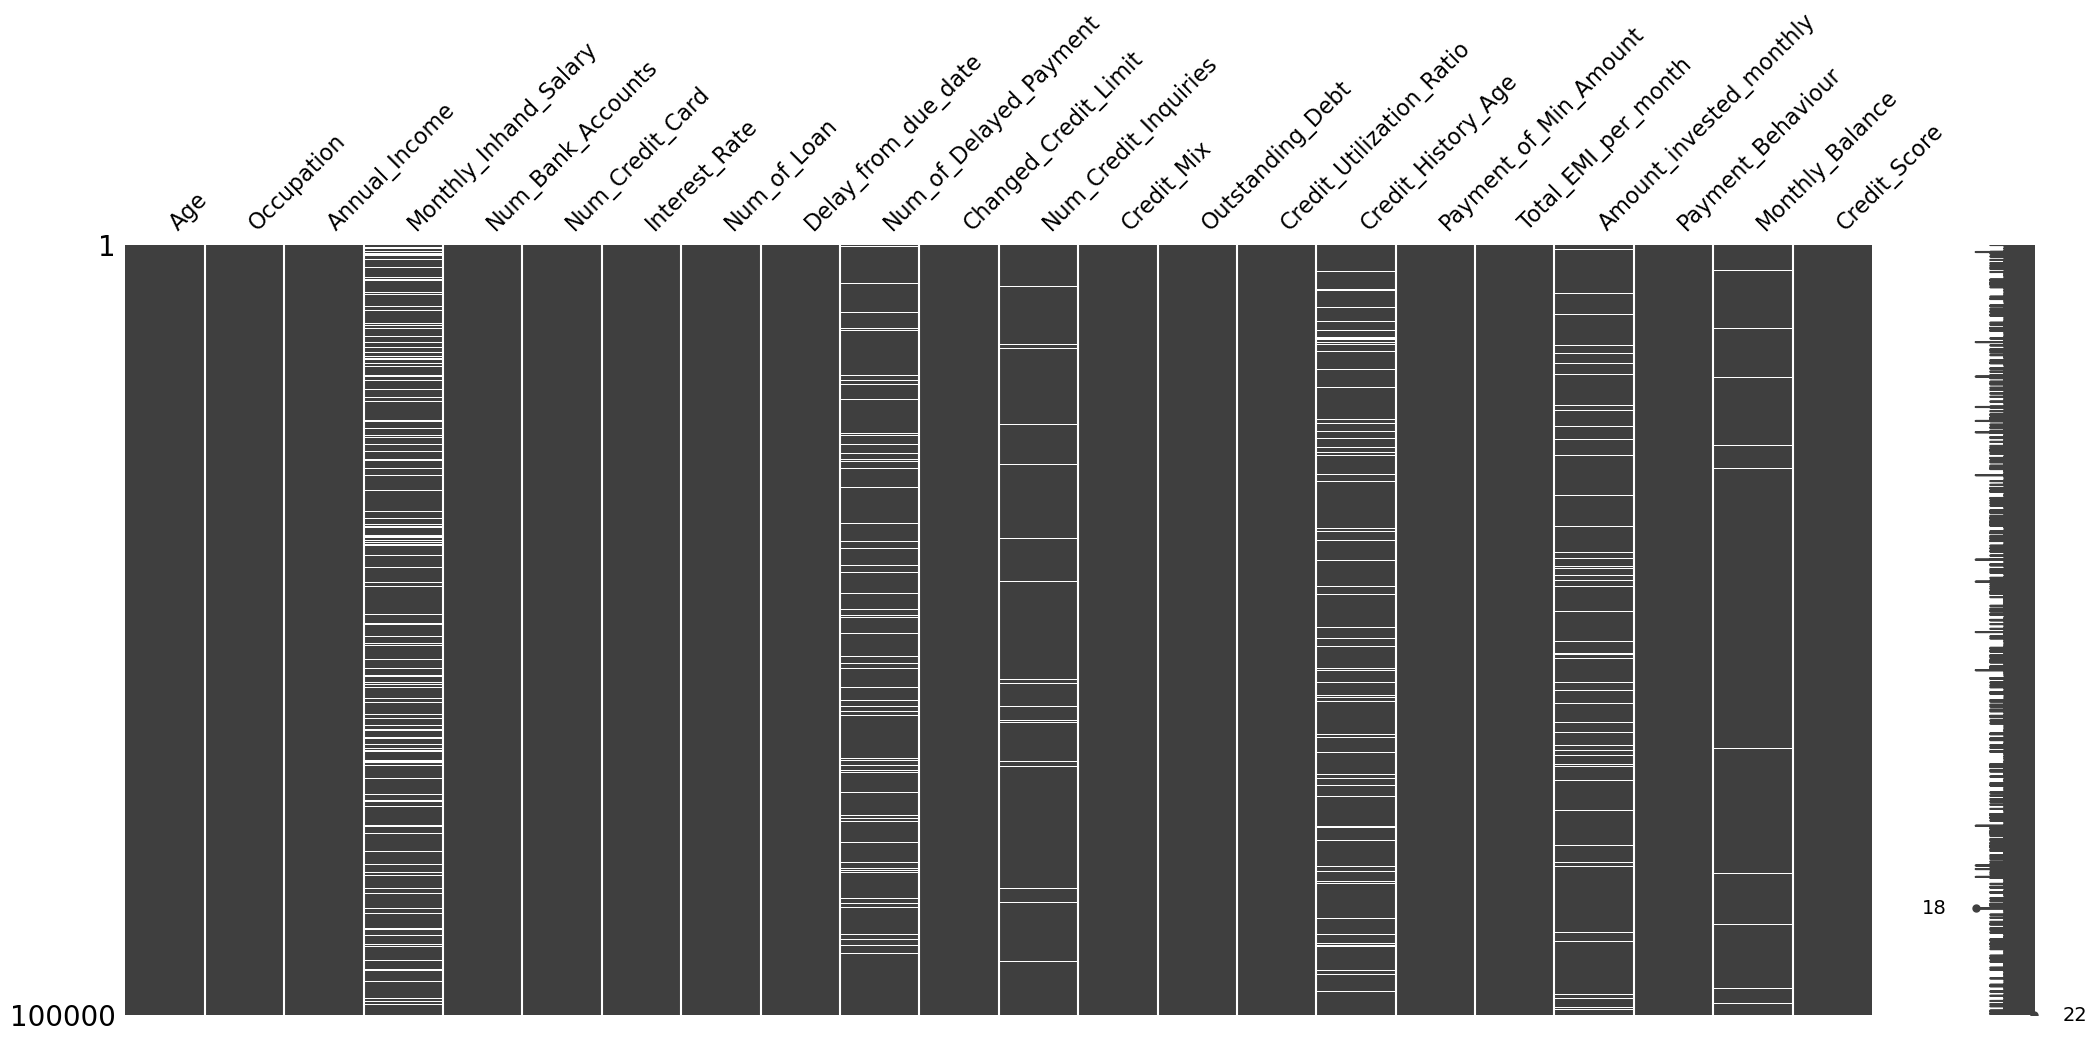

In [11]:
mnso.matrix(data)

<AxesSubplot:>

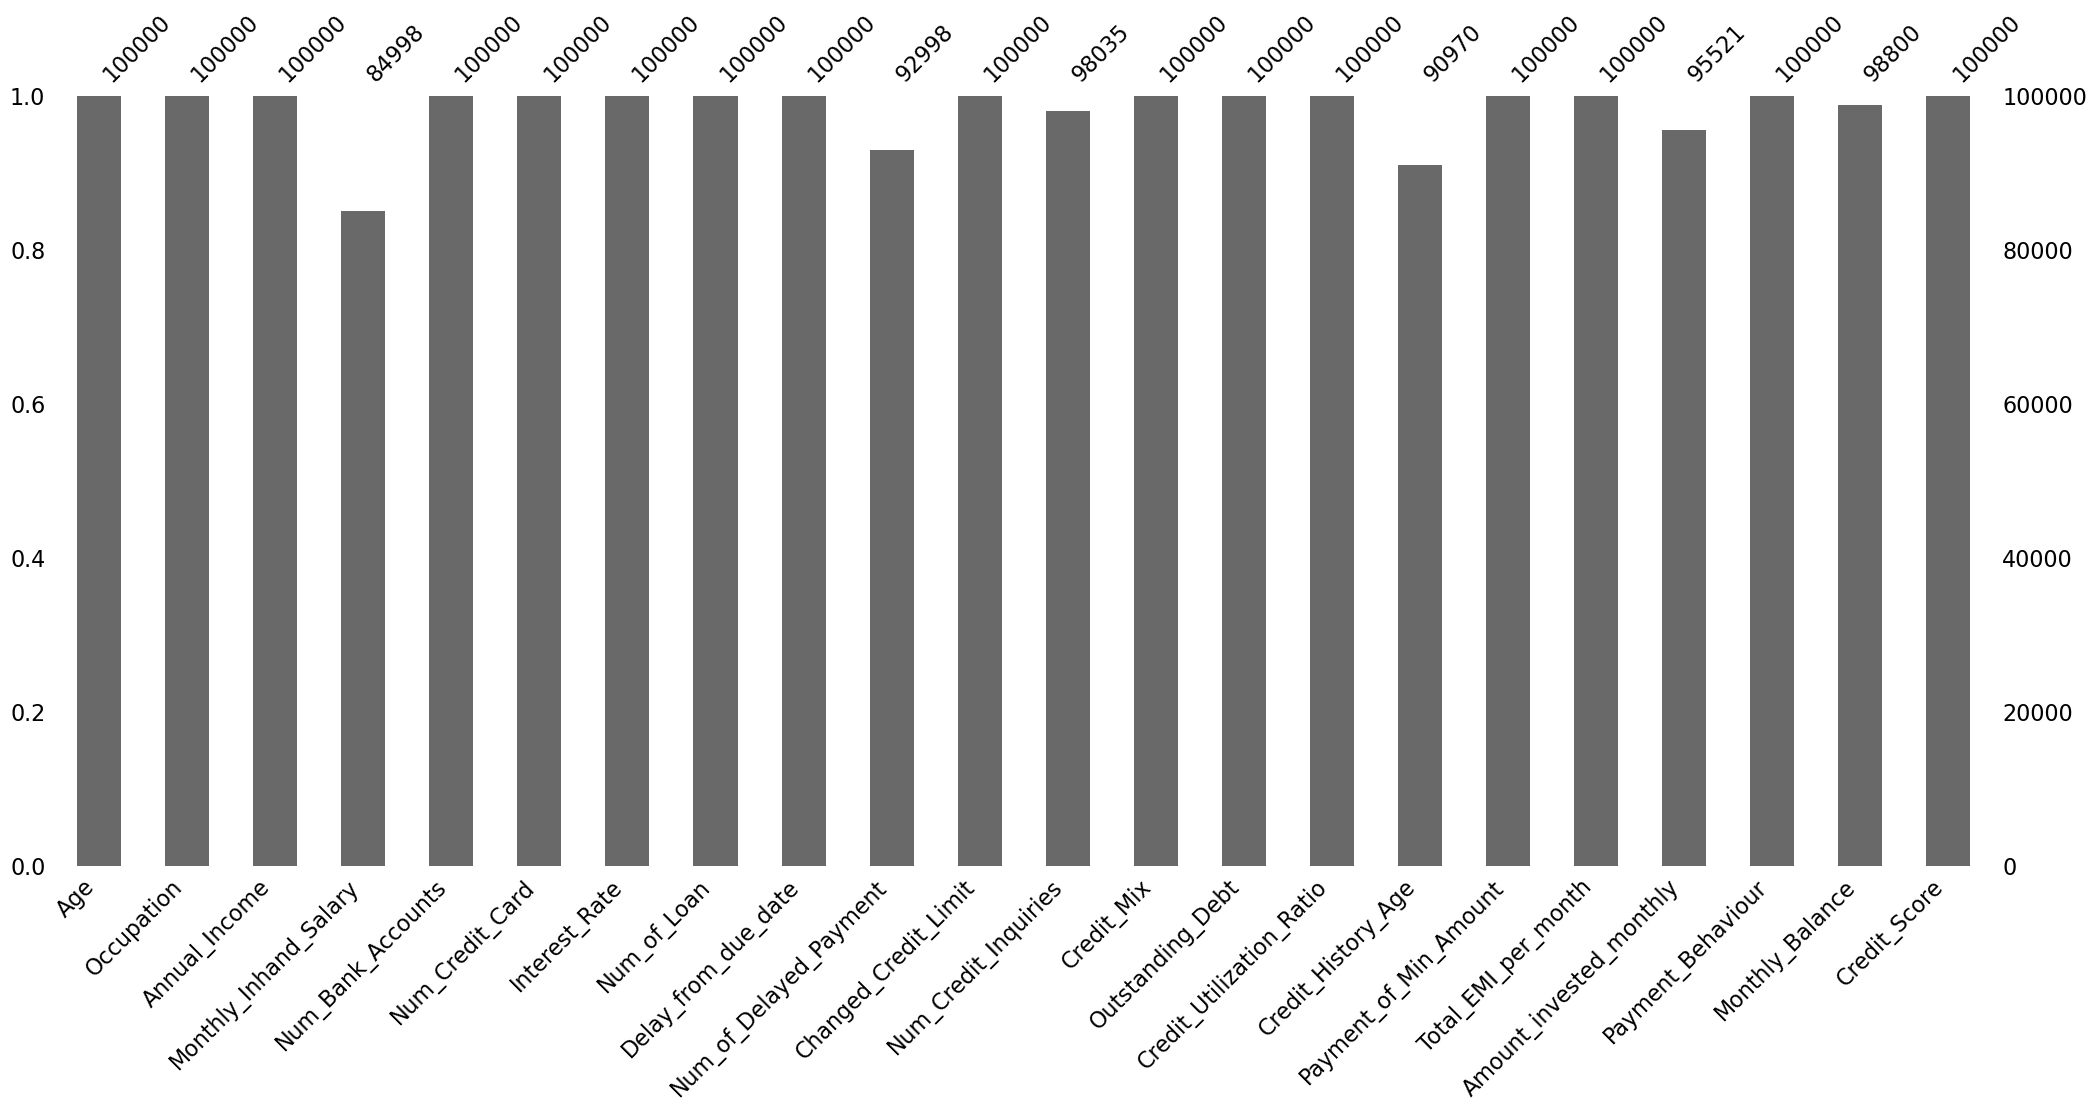

In [12]:
mnso.bar(data)

#### Convert column type

In [13]:
data.dtypes
# wrong type columns: 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Outstanding_Debt, Amount_invested_monthly, Monthly_Balance

Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [14]:
column_regex = ['Age', 'Num_of_Loan','Annual_Income','Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']

for i in column_regex:
    data[i] = data[i].str.replace('_' ,'', regex=True)

In [15]:
for i in column_regex:
    if i == 'Num_of_Delayed_Payment':
        data[i] = data[i].replace(np.NAN , data[i].mode()[0], regex=True)
    data[i] = data[i].replace('' , np.NAN, regex=True)

In [16]:
data = data.astype({'Age':'int', 'Num_of_Loan':'int', 'Num_of_Delayed_Payment':'int', 'Annual_Income':'float', 'Changed_Credit_Limit':'float', 
            'Outstanding_Debt':'float', 'Amount_invested_monthly':'float', 'Monthly_Balance':'float'})

In [17]:
data.dtypes

Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

#### Imputation missing values

In [18]:
col_null_num = []
col_null_cat = []

for col in data.columns:
    if data[col].isna().sum()/len(data)*100 > 0 and data[col].dtype == 'O':
        col_null_cat.append(col)
    elif data[col].isna().sum()/len(data)*100 > 0 and data[col].dtype != 'O':
        col_null_num.append(col)

col_null_cat

['Credit_History_Age']

In [19]:
# imputation missing values with median for numeric column
for col in col_null_num:
    data[col] = data[col].fillna(data[col].median())

In [20]:
# imputation missing values with mode for numeric column
for col in col_null_cat:
    data[col] = data[col].fillna(data[col].mode()[0])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  int64  
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    100000 non-null  int64  
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

### EDA

In [22]:
# count data types
data.dtypes.value_counts()

float64    9
int64      7
object     6
dtype: int64

<AxesSubplot:>

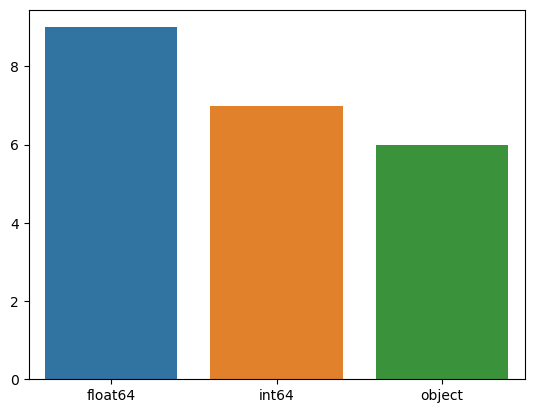

In [23]:
sns.barplot(x=data.dtypes.value_counts().index, y=data.dtypes.value_counts().values)

In [24]:
# check distribution of nimeric columns
data_numeric = data.select_dtypes('number')
data_object = data.select_dtypes('object')

#### EDA numeric fields

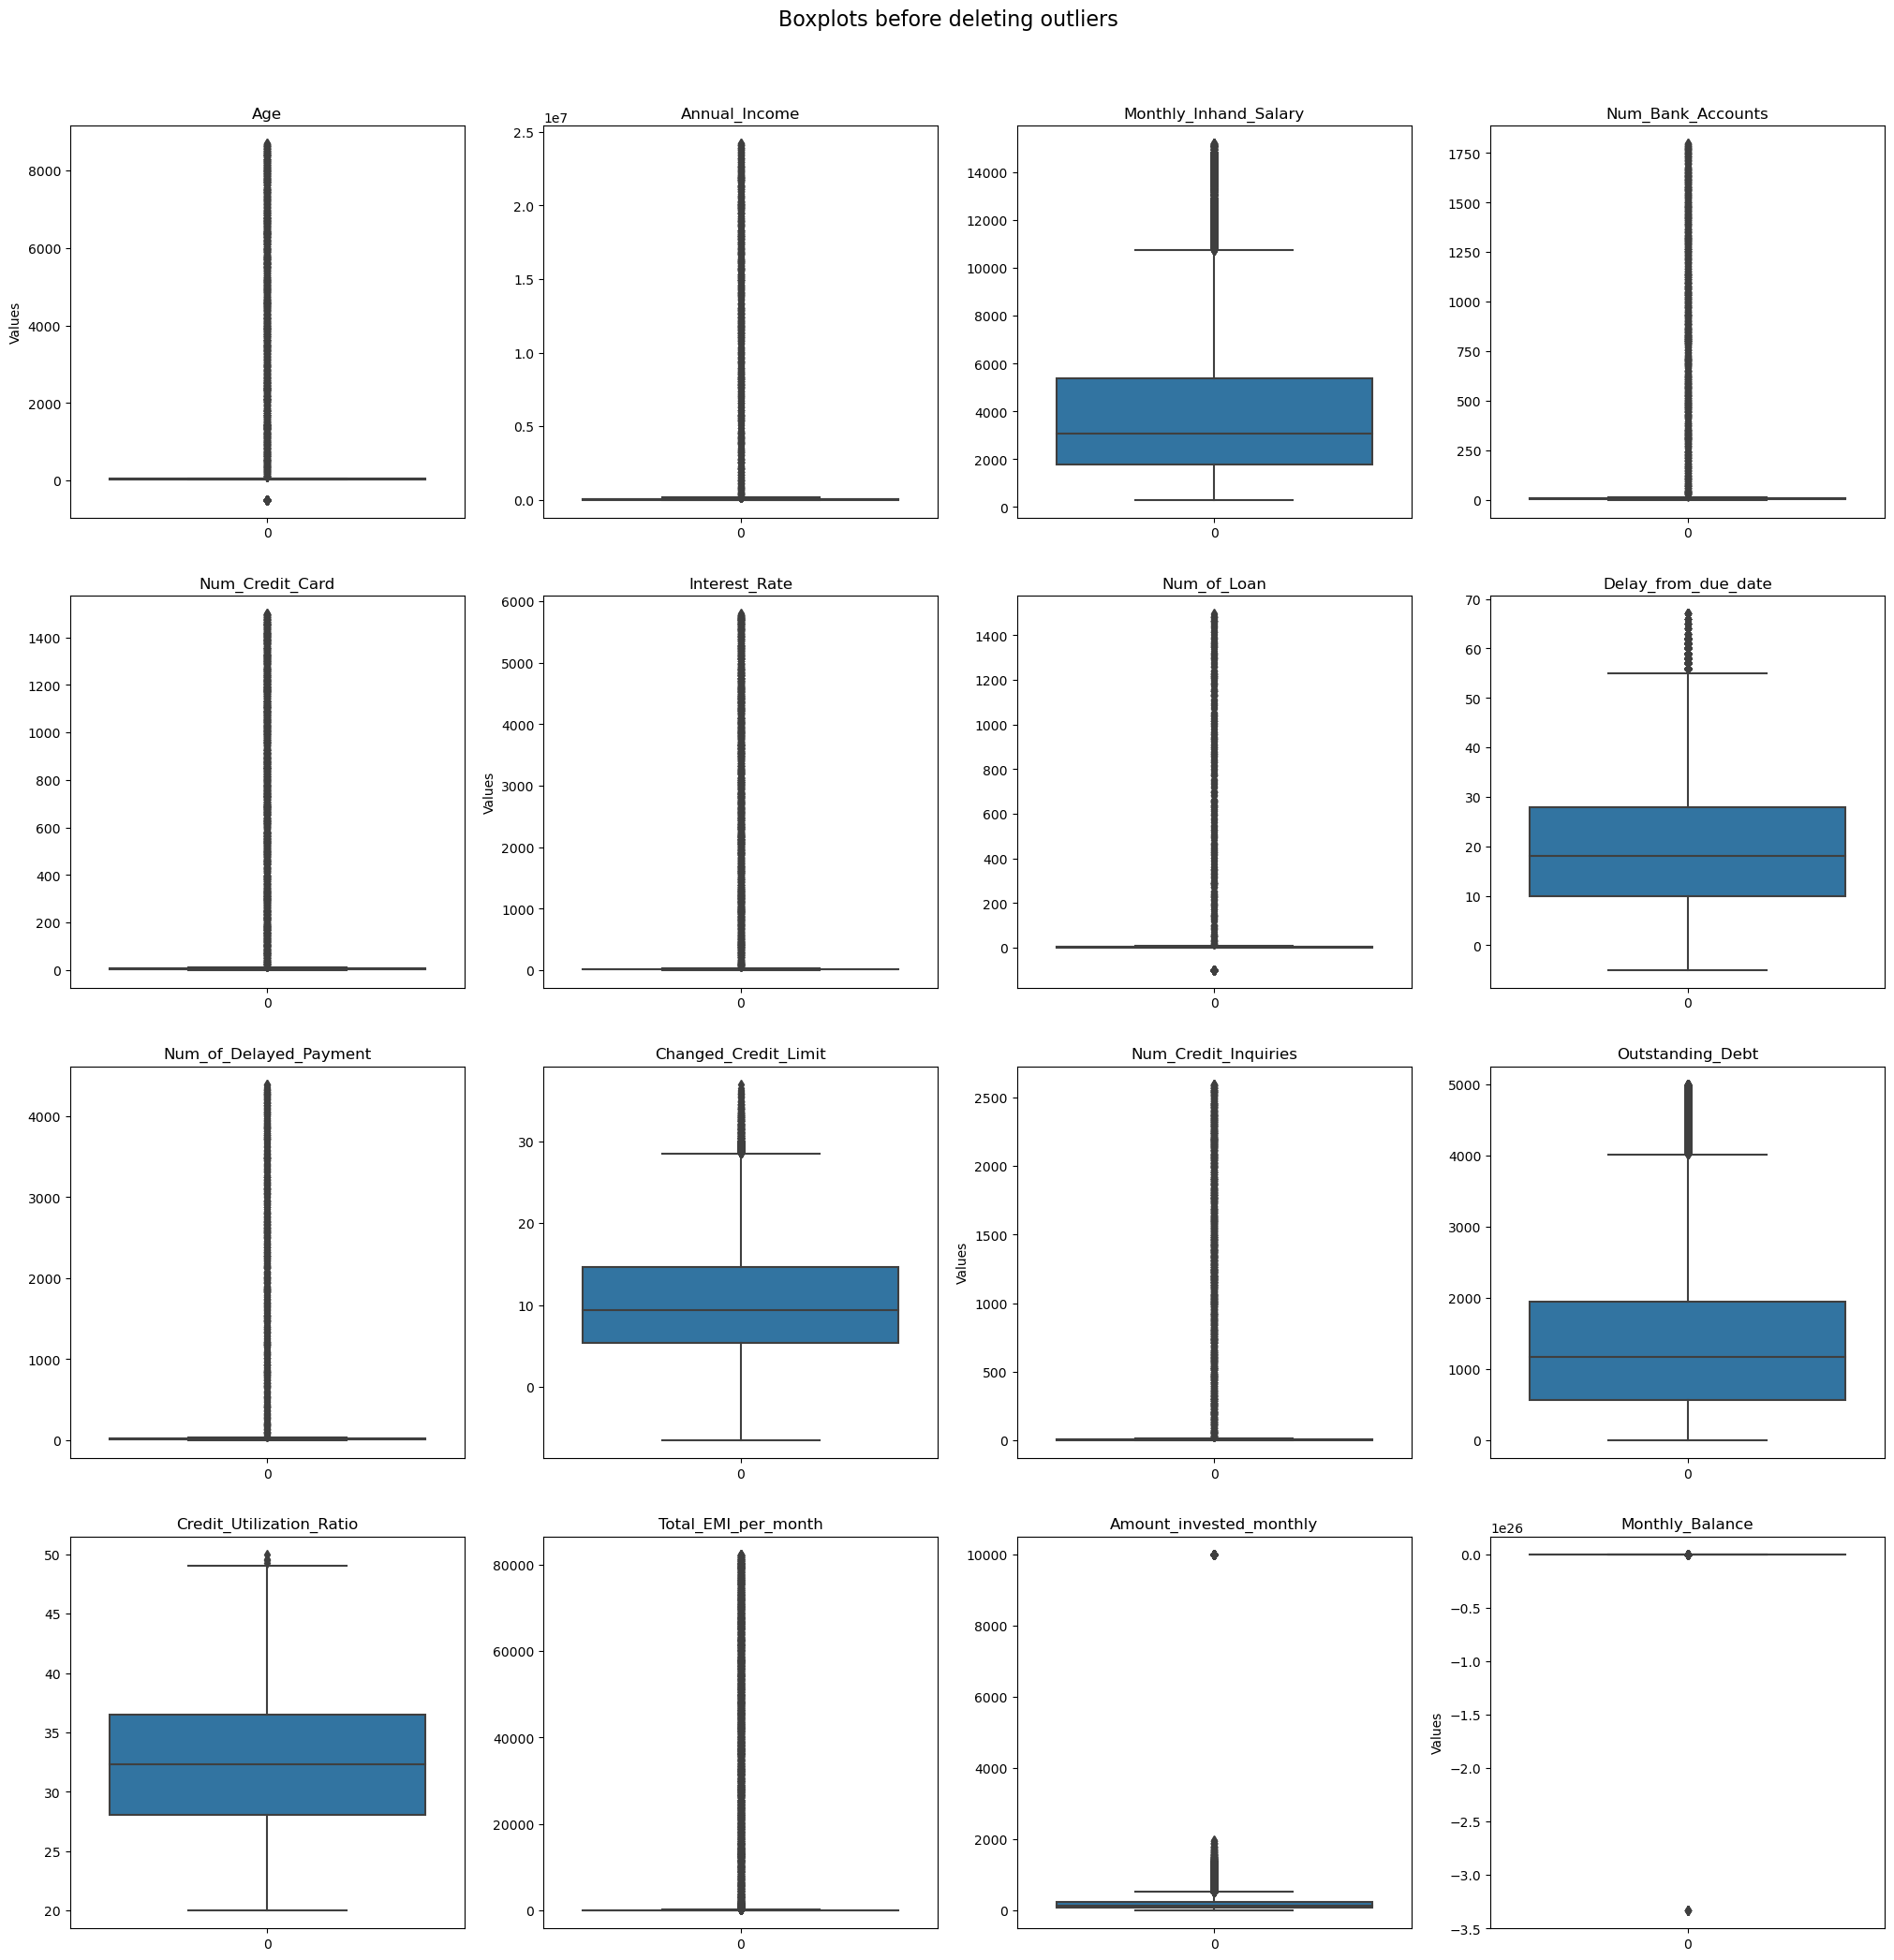

In [25]:
# deleted id columns 
# There isn't the id columns

def box_plot(dataset, cols, suptitle, size):
    fig, axs = plt.subplots(math.ceil(dataset.shape[1]/cols), cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, col in enumerate(list(dataset)):
        if i % 5 == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot(data=dataset[col], ax=axs[i])
        axs[i].set_title(col)
        
box_plot(dataset=data_numeric, cols = 4, suptitle='Boxplots before deleting outliers', size=(25,25))



#### Adjust outliers

In [26]:
def lower_bound(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)

    return lwr_bound

def upper_bound(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # print(q1, q3)
    IQR = q3-q1
    upr_bound = q3+(1.5*IQR)

    return upr_bound


In [27]:
col_outliers = ['Age', 'Amount_invested_monthly']

for col in col_outliers:
    data[col] = np.where(data[col] > upper_bound(data[col]), data[col].median(), 
                (np.where(data[col] < lower_bound(data[col]), data[col].median(), data[col])))

#### EDA categorical fields

In [28]:
# check distribution of nimeric columns
data_object = data.select_dtypes('object')

data_object

,Occupation,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,_,22 Years and 1 Months,No,High_spent_Small_value_payments,Good
1,Scientist,Good,15 Years and 11 Months,No,Low_spent_Large_value_payments,Good
2,Scientist,Good,22 Years and 3 Months,No,Low_spent_Medium_value_payments,Good
3,Scientist,Good,22 Years and 4 Months,No,Low_spent_Small_value_payments,Good
4,Scientist,Good,22 Years and 5 Months,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...
99995,Mechanic,_,31 Years and 6 Months,No,High_spent_Large_value_payments,Poor
99996,Mechanic,_,31 Years and 7 Months,No,High_spent_Medium_value_payments,Poor
99997,Mechanic,Good,31 Years and 8 Months,No,High_spent_Large_value_payments,Poor
99998,Mechanic,Good,31 Years and 9 Months,No,Low_spent_Large_value_payments,Standard


In [29]:
# check unique values
data_object.nunique()

Occupation                16
Credit_Mix                 4
Credit_History_Age       404
Payment_of_Min_Amount      3
Payment_Behaviour          7
Credit_Score               3
dtype: int64

In [30]:
data_object.head()

,Occupation,Credit_Mix,Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,_,22 Years and 1 Months,No,High_spent_Small_value_payments,Good
1,Scientist,Good,15 Years and 11 Months,No,Low_spent_Large_value_payments,Good
2,Scientist,Good,22 Years and 3 Months,No,Low_spent_Medium_value_payments,Good
3,Scientist,Good,22 Years and 4 Months,No,Low_spent_Small_value_payments,Good
4,Scientist,Good,22 Years and 5 Months,No,High_spent_Medium_value_payments,Good


In [31]:
data_creadeit_history_age = data['Credit_History_Age'].str.split(' ', expand=True)

data['Credit_History_Age_Years'] = data_creadeit_history_age[0].astype('int')
data['Credit_History_Age_Months'] = data_creadeit_history_age[3].astype('int')

data.drop('Credit_History_Age', axis=1, inplace=True)

### Categorical encode

In [32]:
data['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [33]:
data.select_dtypes('object')

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,_,No,High_spent_Small_value_payments,Good
1,Scientist,Good,No,Low_spent_Large_value_payments,Good
2,Scientist,Good,No,Low_spent_Medium_value_payments,Good
3,Scientist,Good,No,Low_spent_Small_value_payments,Good
4,Scientist,Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...
99995,Mechanic,_,No,High_spent_Large_value_payments,Poor
99996,Mechanic,_,No,High_spent_Medium_value_payments,Poor
99997,Mechanic,Good,No,High_spent_Large_value_payments,Poor
99998,Mechanic,Good,No,Low_spent_Large_value_payments,Standard


In [34]:
encoding_ordinal = {'Credit_Mix': {'_':0, 'Bad':1, 'Standard':2, 'Good':3}, 
                    'Payment_Behaviour': {  'High_spent_Small_value_payments':4,
                                            'Low_spent_Large_value_payments':3,
                                            'Low_spent_Medium_value_payments':2,
                                            'Low_spent_Small_value_payments':1,
                                            'High_spent_Medium_value_payments':5,
                                            'High_spent_Large_value_payments':6},
                    'Payment_of_Min_Amount': {'Yes':1, 'No':0, 'NM':0}}

data = data.replace(encoding_ordinal)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Buat objek LabelEncoder
le = LabelEncoder()


# Cocokkan dan ubah data kategorikal
data[ 'Occupation' ] = le.fit_transform(data[ 'Occupation' ])

data

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Years,Credit_History_Age_Months
0,23.0,12,19114.12,1824.843333,3,4,3,4,3,7,...,809.98,26.822620,0,49.574949,80.415295,4,312.494089,Good,22,1
1,23.0,12,19114.12,3093.745000,3,4,3,4,-1,19,...,809.98,31.944960,0,49.574949,118.280222,3,284.629162,Good,15,11
2,33.0,12,19114.12,3093.745000,3,4,3,4,3,7,...,809.98,28.609352,0,49.574949,81.699521,2,331.209863,Good,22,3
3,23.0,12,19114.12,3093.745000,3,4,3,4,5,4,...,809.98,31.377862,0,49.574949,199.458074,1,223.451310,Good,22,4
4,23.0,12,19114.12,1824.843333,3,4,3,4,6,19,...,809.98,24.797347,0,49.574949,41.420153,5,341.489231,Good,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,9,39628.99,3359.415833,4,6,7,2,23,7,...,502.38,34.663572,0,35.104023,60.971333,6,336.449266,Poor,31,6
99996,25.0,9,39628.99,3359.415833,4,6,7,2,18,7,...,502.38,40.565631,0,35.104023,54.185950,5,336.449266,Poor,31,7
99997,25.0,9,39628.99,3359.415833,4,6,5729,2,27,6,...,502.38,41.255522,0,35.104023,24.028477,6,336.449266,Poor,31,8
99998,25.0,9,39628.99,3359.415833,4,6,7,2,20,19,...,502.38,33.638208,0,35.104023,251.672582,3,336.449266,Standard,31,9


In [36]:
data = data[data['Payment_Behaviour']!='!@9#%8']

### Feature selection

<AxesSubplot:>

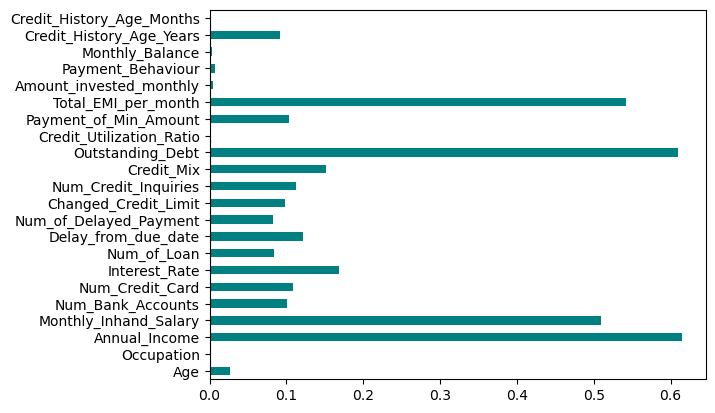

In [37]:
from sklearn.feature_selection import mutual_info_classif

X = data.loc[:,data.columns != 'Credit_Score']
Y = data['Credit_Score']

importance = mutual_info_classif(X,Y)
feat_importance = pd.Series(importance, X.columns)
feat_importance.plot(kind='barh', color='teal')

In [38]:
X_col = feat_importance[feat_importance > 0.1].index

### Build Model

In [39]:
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
    cross_validate
)

In [40]:
X = data[X_col]
y = data['Credit_Score']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [41]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)


# transform training data
X_train = norm.transform(X_train)


# transform testing dataabs
X_test = norm.transform(X_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
forest_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')

forest_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [46]:
# Predictions
y_pred = forest_classifier.predict(X_test)

### evaluation

In [51]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score
)

In [65]:
print(
    'Accuracy Score: ',
    accuracy_score(y_test, y_pred, normalize=True).round(4)*100, '%'
)

Accuracy Score:  76.48 %


In [56]:
conf_mtx = confusion_matrix(y_test, y_pred)
conf_mtx

array([[2333,   32,  939],
       [  94, 4190, 1088],
       [ 891, 1302, 7611]])

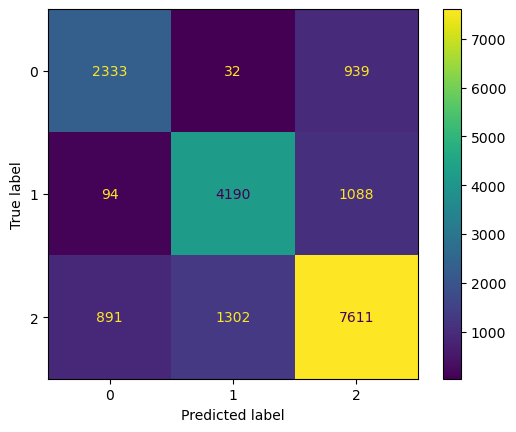

In [58]:
conf_mtx_plot = ConfusionMatrixDisplay(
    confusion_matrix=conf_mtx
)

conf_mtx_plot.plot()
plt.show()

In [59]:
report = classification_report(
    y_test, y_pred
)
print(report)

              precision    recall  f1-score   support

        Good       0.70      0.71      0.70      3304
        Poor       0.76      0.78      0.77      5372
    Standard       0.79      0.78      0.78      9804

    accuracy                           0.76     18480
   macro avg       0.75      0.75      0.75     18480
weighted avg       0.77      0.76      0.76     18480



#### Hyperparameter tuning

In [73]:
rdnfor_classifier = RandomForestClassifier(
    n_estimators=25,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='gini'
)
rdnfor_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25)

In [74]:
rdnfor_pred = rdnfor_classifier.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, rdnfor_pred).round(4)*100, '%')

Accuracy Score:  76.87 %


In [75]:
param_grid = {
    'n_estimators': [5, 25, 50, 75,100, 125],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,2,3]
}

grid_search = GridSearchCV(
    estimator = rdnfor_classifier,
    param_grid = param_grid
)

grid_search.fit(X_train, y_train)

/Users/waresix/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/waresix/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/waresix/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/waresix/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constra

GridSearchCV(estimator=RandomForestClassifier(n_estimators=25),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [5, 25, 50, 75, 100, 125]})

In [76]:
print('Best Parameter: ', grid_search.best_params_)

Best Parameter:  {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 125}


In [77]:
rdnfor_classifier_optimized = RandomForestClassifier(
    n_estimators=125,
    min_samples_split=2,
    min_samples_leaf=2
)

rdnfor_classifier_optimized.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=125)

In [78]:
rdnfor_pred_optimized = rdnfor_classifier_optimized.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, rdnfor_pred_optimized).round(4)*100, '%')

Accuracy Score:  78.53999999999999 %
